## <div align="center"> TUGAS AKHIR IF540 MACHINE LEARNING </div>
## <div align="center"> Semester Genap 2022/2023 </div>
### <div align="center"> PREDIKSI HARGA SAHAM PT INDOFOOD CBP SUKSES MAKMUR TBK (ICBP) DENGAN ALGORITMA LSTM </div>

### Header

In [1]:
import datetime
import uuid    

# Anggota Kelompok
kelompok = "A"
mhs1 = "Daffa Kaisha Pratama Chandra"
nim1 = "00000055770"

mhs2 = "Fidelia Rahmah"
nim2 = "00000058832"

mhs3 = "Mella Margareta Veronica"
nim3 = "00000059669"

mhs4 = "Rani Junarti"
nim4 = "00000058597"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print(f"Kelompok {kelompok}:")
print(f"{mhs1}" + "\t" + f"{nim1}")
print(f"{mhs2}" + "\t\t\t" + f"{nim2}")
print(f"{mhs3}" + "\t" + f"{nim3}")
print(f"{mhs4}" + "\t\t\t" + f"{nim4}")
print()
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Kelompok A:
Daffa Kaisha Pratama Chandra	00000055770
Fidelia Rahmah			00000058832
Mella Margareta Veronica	00000059669
Rani Junarti			00000058597

Start: 		2023-06-08 09:37:20.952502
Device ID: 	6489471f-05a5-11ee-8dc9-a8a159405677


### Deskripsi Singkat Dataset:

Dataset yang digunakan adalah data harga saham ICBP dari Januari 2010 hingga Januari 2023. Ada 7 kolom dalam dataset: Date, Open, High, Low, Close, Adj Close, dan Volume.


---

### Dataset yang digunakan:

1. [Dataset Harga Saham ICBP Januari 2010 - Januari 2023] – sumber : [diambil melalui library yfinance]

### Hasil kerja
#### Import Libraries

In [2]:
#%pip install keras-tuner --upgrade
#%pip install seaborn
#%pip install yfinance
#%pip install --upgrade tensorflow

In [3]:
# Raw Package
import numpy as np
import pandas as pd
import math

# Data Source
import yfinance as yf

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from tensorflow import keras
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error

# Ignore Warning
import warnings
warnings.simplefilter('ignore')

#### Baca data saham ICBP
Import data saham ICBP 13 tahun terakhir dengan menggunakan library dari yfinance (Yahoo Finance)

In [4]:
# Baca data saham ICBP 
# dari 1 Januari 2010 - 31 Januari 2023
tick = "ICBP.JK"
icbp = yf.download(tickers=tick, 
                   start='2010-01-01', 
                   end='2023-01-31').reset_index()
print(tick.upper()+" Stock Data history")

# Print data saham
icbp

[*********************100%***********************]  1 of 1 completed
ICBP.JK Stock Data history


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1787.5,1850.0,1762.5,1837.5,1408.558960,26442000
1,2010-01-05,1875.0,1887.5,1825.0,1875.0,1437.305176,42874000
2,2010-01-06,1900.0,1925.0,1862.5,1862.5,1427.723145,44946000
3,2010-01-07,1875.0,1912.5,1862.5,1875.0,1437.305176,24863000
4,2010-01-08,1900.0,1912.5,1862.5,1887.5,1446.887207,19118000
...,...,...,...,...,...,...,...
3239,2023-01-24,10475.0,10475.0,10275.0,10400.0,10400.000000,1978500
3240,2023-01-25,10400.0,10450.0,10300.0,10425.0,10425.000000,1422900
3241,2023-01-26,10425.0,10425.0,10000.0,10075.0,10075.000000,11211000
3242,2023-01-27,10075.0,10125.0,9925.0,10000.0,10000.000000,6769700


##### Melihat sekilas informasi mengenai dataset

In [5]:
# Mendapatkan informasi dari dataset
icbp.info()
print("\n Shape of data: ", icbp.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244 entries, 0 to 3243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3244 non-null   datetime64[ns]
 1   Open       3244 non-null   float64       
 2   High       3244 non-null   float64       
 3   Low        3244 non-null   float64       
 4   Close      3244 non-null   float64       
 5   Adj Close  3244 non-null   float64       
 6   Volume     3244 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 177.5 KB

 Shape of data:  (3244, 7)


Dataset memiliki 3244 baris dan 7 kolom

##### Melihat deskripsi statistik sederhana dari dataset

In [6]:
# Deskripsi statistik sederhana dari dataset
icbp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3.244000e+03
mean,6886.078144,6963.447904,6799.206227,6884.729501,6133.226878,9.135129e+06
std,2854.014555,2876.904152,2822.784823,2850.737894,2835.758656,1.695037e+07
min,1687.500000,1725.000000,1650.000000,1675.000000,1283.992554,0.000000e+00
25%,4868.750000,4975.000000,4750.000000,4900.000000,3986.066223,3.112275e+06
50%,8000.000000,8125.000000,7900.000000,7987.500000,7142.033691,5.197250e+06
75%,8900.000000,8975.000000,8800.000000,8900.000000,8346.713867,8.904400e+06
max,12500.000000,12550.000000,12275.000000,12400.000000,11525.491211,5.704650e+08


#### Exploratory Data Analysis
Data historis harga saham ICBP dari tahun Januari 2010 hingga Januari 2023

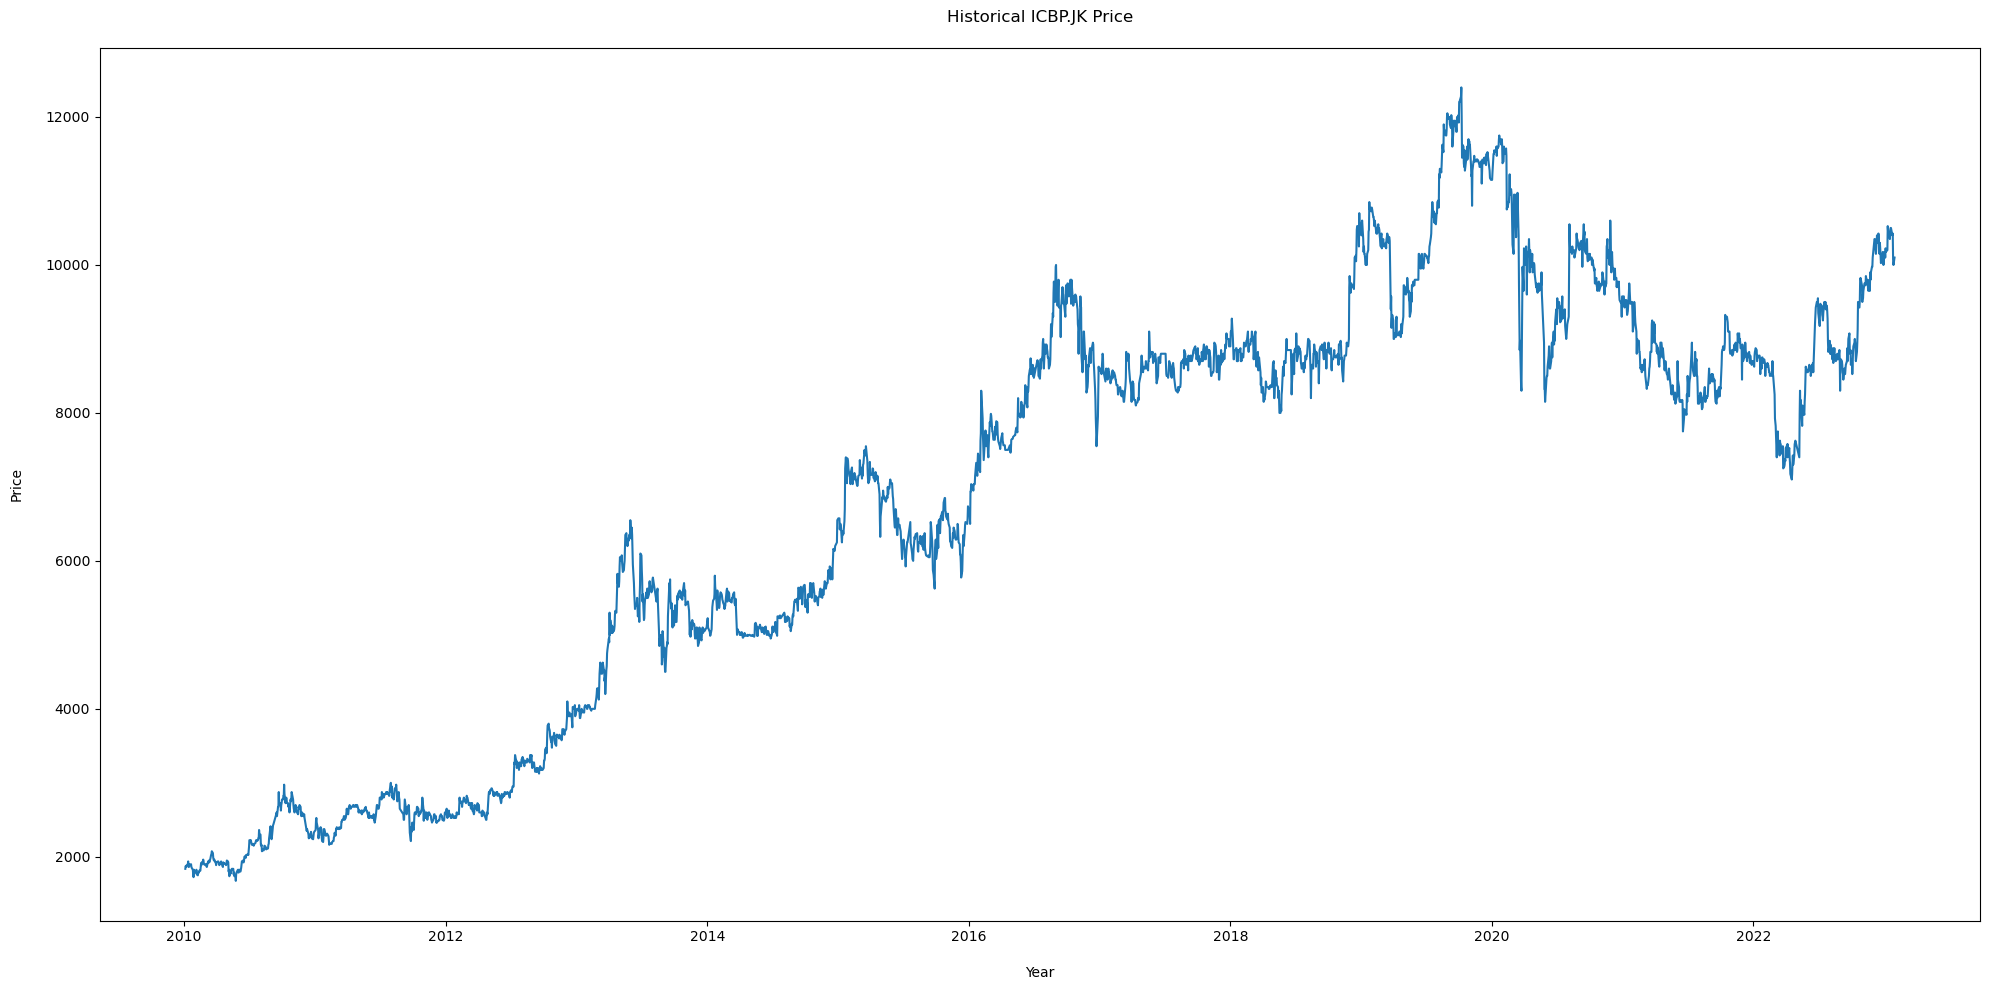

In [7]:
# Visualisasi Harga Shaam ICBP dalam periode 2010 - Januari 2023
plt.figure(figsize=(20,10))
plt.plot(icbp['Date'], icbp['Close'])
plt.title("Historical " 
          +tick.upper()+ " Price\n")
plt.xlabel("\nYear")
plt.ylabel("Price\n")
plt.tight_layout()
#plt.xticks(rotation=45)
plt.show()

Distribusi harga saham ICBP dari Januari 2010 hingga Januari 2023

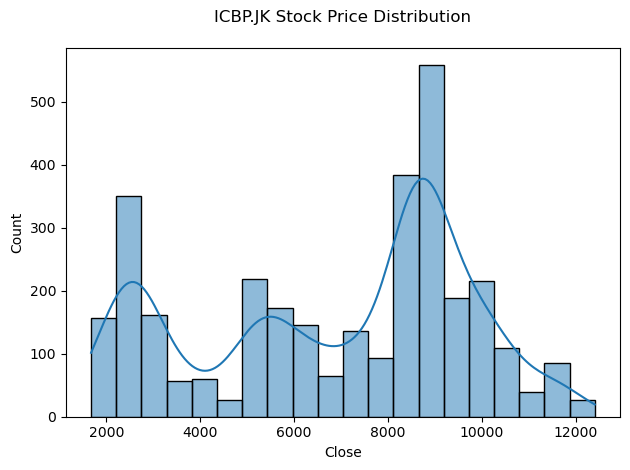

In [8]:
# Visualize the price distribution
sns.histplot(icbp['Close'], kde=True)
plt.title("ICBP.JK Stock Price Distribution\n")
plt.tight_layout()
plt.show()

Cek missing values

In [9]:
icbp.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Tidak ditemukan missing values.

Cek outliers

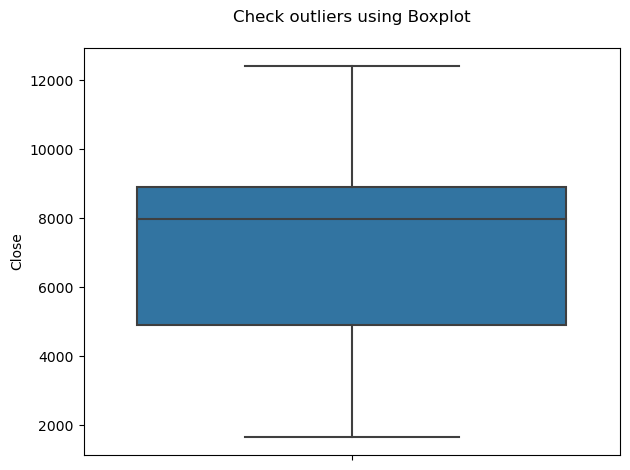

In [10]:
# Check outliers using boxplot on Price column
sns.boxplot(y=icbp['Close'])
plt.title("Check outliers using Boxplot\n")
plt.tight_layout()
plt.show()

Tidak ditemukan outliers

---

#### Data Pre-Processing

In [11]:
close_prices = icbp['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.7)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(2211, 60, 1)

1. **close_prices = icbp['Close'], values = close_prices.values**
Menjadikan kolom Close menjadi time series.
2. **training_data_len = math.ceil(len(values)* 0.7)**
dan menentukan panjang train data sebesar 70% dari range waktu yang digunakan. 
3. **scaler = MinMaxScaler(feature_range=(0,1)), scaled_data = scaler.** Kita lakukan normalize dan reshape ke 2D. Ini penting dalam model machine learning karena rentang nilai yang besar dapat mempengaruhi kinerja algoritma. Dengan melakukan normalisasi, kita memastikan bahwa semua fitur memiliki skala yang serupa, sehingga tidak ada fitur yang mendominasi yang lain. Dalam konteks ini, kita ingin memastikan bahwa semua data saham memiliki skala yang serupa sehingga model LSTM dapat menginterpretasikan pola-pola dengan baik.

4. **fit_transform(values.reshape(-1,1)), train_data = scaled_data[0: training_data_len, :]** selanjutnya fungsi fit_transform kita gunakan untuk menghitung dan menerapkan transformasi normalisasi pada data yang diberikan. Disini kita menerapkan fit_transform pada values (kolom close)

5. **for i in range(60, len(train_data)):** Setiap iterasi, 60 hari terakhir dari data pelatihan (dari i-60 hingga i) diambil sebagai fitur (x_train) untuk melatih model. Ini berarti model akan menggunakan 60 hari sebelumnya sebagai masukan untuk memprediksi nilai pada hari ke-61. Selanjutnya, nilai pada hari ke-61 (train_data[i, 0]) diambil sebagai label (y_train). Ini adalah nilai yang ingin diprediksi oleh model.
dan membuat fungsi perulangan untuk prediksi yaitu menggunakan 60 hari untuk memprediksi hari ke 61. Maka dari itu, didapatkan shape dari x_train yaitu 2211 jumlah data dalam x_train, panjang sekuens untuk pelatihan sepanjang 60, dan jumlah fitur yang digunakan 1 yaitu Close.

6. **x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))** Pada kode tersebut, x_train dan y_train dikonversi menjadi array NumPy menggunakan np.array(). Kemudian, x_train diubah bentuknya (reshaped) menjadi tiga dimensi menggunakan np.reshape(). Tujuan dari langkah ini adalah untuk mempersiapkan data dalam format yang sesuai untuk model LSTM. Model LSTM membutuhkan input dalam bentuk tiga dimensi dengan dimensi pertama sebagai jumlah sampel (jumlah data training), dimensi kedua sebagai jumlah timestep (jumlah hari dalam sekuen), dan dimensi ketiga sebagai jumlah fitur (dalam hal ini, 1 fitur yaitu harga saham). Dengan melakukan reshaping ini, kita mengatur ulang bentuk x_train agar sesuai dengan format yang dibutuhkan oleh model LSTM.

7. **x_train.shape** Maka dari itu didapatkan x_train.shape dengan jumlah data pada train ini sebanyak 2211 dan panjang sekuen sebanyak 60 hari dan jumlah fitur yang digunakan adalah 1 yaitu kolom close.

In [12]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_test.shape

(973, 60, 1)

1. **test_data = scaled_data[training_data_len-60: , : ]** Lebih rinci, jika training_data_len adalah panjang data training yang telah ditentukan (70% dari seluruh dataset), maka scaled_data[training_data_len-60: , : ] akan mengambil 60 baris terakhir dari training_data_len hingga akhir dataset. Jadi bisa dibilang juga 30% + 60

2. **for i in range(60, len(test_data)):** untuk pengulangan for kita lakukan untuk membangun x_test yang merupakan sekuensial data fitur yang akan digunakan dalam model machine learning seperti LSTM. pada setiap loop kita mengambil 60 baris dan nilai ke-60 yang disimpan di x_test pada setiap perulangan
menetapkan dalam data test untuk memprediksi 1 hari dari 60 hari sebelumnya. Sehingga didapatkan kembali shape dari x_test yaitu jumlah data sebanyak 973, time sekuens sebanyak 60, dan masih menggunakan 1 fitur yaitu Close.

3. **x_test.shape** Maka dari itu didapatkan shape dari x_test dengan jumlah data 30% dari keseluruhan data yaitu sebanyak 973, dengan sekuens 60, serta fitur yang digunakan sebanyak 1 yaitu kolom close.

#### Data Processing

Membuat model untuk tuning hyperparameter menggunakan library keras_tuner

In [13]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
    for i in range(hp.Int('n_layers', 1, 2)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Flatten(data_format=hp.Choice('flatten_format', values=['channels_first', 'channels_last'], default='channels_first')))
    model.add(Dense(y_train.shape[0], activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
    return model

Penjelasan:
1. <b>model = Sequential():</b> Membuat objek model Sequential yang akan digunakan untuk membangun model secara bertahap.
2. <b>model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32), return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2]))):</b> Menambahkan layer LSTM pertama ke dalam model. Jumlah unit LSTM pada layer ini merupakan sebuah hyperparameter yang akan diatur saat tuning. Hyperparameter ini dinamakan 'input_unit' dan memiliki nilai minimum 32, maksimum 512, dengan kelipatan 32. return_sequences=True mengindikasikan bahwa layer ini akan mengembalikan hasil keluaran dalam urutan sekuensial.
3. <b>for i in range(hp.Int('n_layers', 1, 2)): </b>: Melakukan loop berdasarkan jumlah layer LSTM yang akan ditambahkan ke dalam model. Jumlah layer LSTM ini juga merupakan sebuah hyperparameter yang dinamakan 'n_layers' dengan nilai minimum 1 dan maksimum 2.
4. <b> model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32), return_sequences=True)): </b> Menambahkan layer LSTM berikutnya ke dalam model. Jumlah unit LSTM pada layer ini juga merupakan sebuah hyperparameter dengan nama yang berbeda-beda untuk setiap layer, seperti 'lstm_0_units', 'lstm_1_units', dan seterusnya. Nilai hyperparameter ini akan diatur saat tuning.
5. <b> model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32))): </b> Menambahkan layer LSTM terakhir ke dalam model. Layer ini berbeda dari layer sebelumnya karena return_sequences diatur sebagai False. Ini berarti layer terakhir ini tidak menghasilkan keluaran sekuensial.
6. <b>model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1))): </b> Menambahkan layer Dropout ke dalam model. Layer ini juga merupakan sebuah hyperparameter dengan nama 'Dropout_rate' yang berada dalam rentang antara 0 hingga 0.5 dengan langkah 0.1.
7. <b> model.add(Flatten(data_format=hp.Choice('flatten_format', values=['channels_first', 'channels_last'], default='channels_first'))): </b> Menambahkan layer Flatten ke dalam model. Layer ini digunakan untuk mengubah keluaran dari layer sebelumnya menjadi vektor satu dimensi. Hyperparameter 'flatten_format' digunakan untuk memilih format data antara 'channels_first' atau 'channels_last' saat melakukan flatten pada data.
8. <b> model.add(Dense(y_train.shape[0], activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu'))): </b> Menambahkan layer Dense (fully connected layer) ke dalam model. Jumlah unit pada layer ini sesuai dengan dimensi keluaran dari data pelatihan. Hyperparameter 'dense_activation' digunakan untuk memilih fungsi aktivasi antara 'relu' atau 'sigmoid' untuk layer Dense.
9. <b> model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse']):</b>
digunakan untuk mengompilasi model yang telah dibangun sebelumnya. Fungsi ini menerima beberapa argumen yang diperlukan untuk mengkonfigurasi proses pelatihan model.

Inisialisasi hyperparameter tuning dengan metode RandomSearch

In [14]:
import keras_tuner as kt

tuner = kt.RandomSearch(build_model, objective="mse", 
                        max_trials = 4, 
                        executions_per_trial =1, 
                        directory = "./tuning" # menyimpan hasil tuning parameter ke folder tuning
                        )

INFO:tensorflow:Reloading Tuner from ./tuning\untitled_project\tuner0.json


Tuning hyperparameter dilakukan dengan tujuan untuk meminimalisir nilai mean squared error (MSE), percobaan dilakukan sebanyak 4 kali, dimana ditiap percobaan akan dilakukan evaluasi sebanyak 1 kali. Hasil tuning hyperparameter disimpan kedalam folder tuning.  

Proses Tuning Hyperparameter

In [15]:
tuner.search(
        x=x_train,
        y=y_train,
        epochs=50,
        batch_size=256,
        validation_split=0.2
)

INFO:tensorflow:Oracle triggered exit


Melakukan tuning hyperparameter dengan RandomSearch pada data latih, dengan jumlah iterasi sebanyak 50 (epochs) dan sampel yang digunakan dalam satu iterasi pelatihan adalah 256 (batch_size). Digunakan juga parameter validation split (mengambil sebagian dari data latih) sebanyak 20%.

In [16]:
best_model = tuner.get_best_models(num_models=1)[0]

Variabel best_model akan berisi model terbaik yang telah ditemukan oleh tuner setelah melakukan pencarian hyperparameter. Model ini dapat digunakan untuk melakukan prediksi pada data baru atau dievaluasi lebih lanjut sesuai kebutuhan.

In [17]:
tuner.results_summary()

Results summary
Results in ./tuning\untitled_project
Showing 10 best trials
Objective(name="mse", direction="min")

Trial 3 summary
Hyperparameters:
input_unit: 96
n_layers: 2
lstm_0_units: 96
layer_2_neurons: 192
Dropout_rate: 0.30000000000000004
flatten_format: channels_last
dense_activation: sigmoid
lstm_1_units: 256
Score: 0.0007669955957680941

Trial 2 summary
Hyperparameters:
input_unit: 320
n_layers: 2
lstm_0_units: 32
layer_2_neurons: 224
Dropout_rate: 0.4
flatten_format: channels_first
dense_activation: relu
lstm_1_units: 32
Score: 0.0011613585520535707

Trial 1 summary
Hyperparameters:
input_unit: 288
n_layers: 1
lstm_0_units: 224
layer_2_neurons: 96
Dropout_rate: 0.0
flatten_format: channels_first
dense_activation: relu
Score: 0.03287896886467934

Trial 0 summary
Hyperparameters:
input_unit: 288
n_layers: 1
lstm_0_units: 256
layer_2_neurons: 96
Dropout_rate: 0.30000000000000004
flatten_format: channels_first
dense_activation: sigmoid
Score: 0.042141757905483246


Mencetak ringkasan hasil dari proses pencarian hyperparameter yang dilakukan oleh tuner.

#### Modeling

##### Perbandingan model
Pembangunan model LSTM dengan parameter random.

In [18]:
input_unit = 288
n_layers = 2
lstm_0_units = 256
layer_2_neurons = 100
Dropout_rate = 0.300000004
flatten_format = 'channels_first'
dense_activation = 'sigmoid'
lstm_1_units = 256

# Define the LSTM model
model = keras.Sequential()

# Add the first LSTM layer
model.add(keras.layers.LSTM(units=input_unit, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add additional LSTM layers
for i in range(1, n_layers):
    model.add(keras.layers.LSTM(units=lstm_0_units, activation='relu', return_sequences=True))

# Add the last LSTM layer
model.add(keras.layers.LSTM(units=layer_2_neurons))

# Add Dropout layer
model.add(keras.layers.Dropout(rate=Dropout_rate))

# Flatten the output from the LSTM layers
model.add(keras.layers.Flatten(data_format=flatten_format))

# Add dense layers
model.add(keras.layers.Dense(units=lstm_1_units, activation=dense_activation))
model.add(keras.layers.Dense(units=1))

# Line 6
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 288)           334080    
                                                                 
 lstm_5 (LSTM)               (None, 60, 256)           558080    
                                                                 
 lstm_6 (LSTM)               (None, 100)               142800    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 flatten_1 (Flatten)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               25856     
                                                                 
 dense_2 (Dense)             (None, 1)                

Dari kode diatas, penjelasannya adalah:
1. <b> model = keras.Sequential(): </b> Membuat objek model Sequential yang akan digunakan untuk membangun model secara bertahap.
2. <b>model.add(keras.layers.LSTM(units=input_unit, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))): </b> Menambahkan layer LSTM pertama ke dalam model. Jumlah unit LSTM pada layer ini adalah input_unit yang merupakan suatu variabel yang diharapkan telah didefinisikan sebelumnya. Fungsi aktivasi yang digunakan adalah 'relu'. return_sequences=True mengindikasikan bahwa layer ini akan mengembalikan hasil keluaran dalam urutan sekuensial. input_shape=(x_train.shape[1], 1) menentukan dimensi input untuk layer ini.
3. <b>for i in range(1, n_layers):: </b> Melakukan loop berdasarkan jumlah layer LSTM yang akan ditambahkan ke dalam model. Jumlah layer LSTM ini ditentukan oleh variabel n_layers yang diharapkan telah didefinisikan sebelumnya. Loop dimulai dari 1 karena layer pertama sudah ditambahkan sebelumnya.
4. <b> model.add(keras.layers.LSTM(units=lstm_0_units, activation='relu', return_sequences=True)): </b> Menambahkan layer LSTM berikutnya ke dalam model. Jumlah unit LSTM pada layer ini adalah lstm_0_units yang merupakan suatu variabel yang diharapkan telah didefinisikan sebelumnya. Fungsi aktivasi yang digunakan adalah 'relu'. return_sequences=True mengindikasikan bahwa layer ini akan mengembalikan hasil keluaran dalam urutan sekuensial.
5. <b> model.add(keras.layers.LSTM(units=layer_2_neurons)): </b> Menambahkan layer LSTM terakhir ke dalam model. Jumlah unit LSTM pada layer ini adalah layer_2_neurons yang merupakan suatu variabel yang diharapkan telah didefinisikan sebelumnya. Layer ini berbeda dari layer sebelumnya karena return_sequences diatur sebagai False. Ini berarti layer terakhir ini tidak menghasilkan keluaran sekuensial.
6. <b> model.add(keras.layers.Dropout(rate=Dropout_rate)): </b> Menambahkan layer Dropout ke dalam model. Layer ini digunakan untuk menerapkan dropout pada output sebelumnya dengan tingkat dropout yang ditentukan oleh variabel Dropout_rate yang diharapkan telah didefinisikan sebelumnya.
7. <b> model.add(keras.layers.Flatten(data_format=flatten_format)): 
</b> Menambahkan layer Flatten ke dalam model. Layer ini digunakan untuk mengubah keluaran dari layer sebelumnya menjadi vektor satu dimensi. data_format ditentukan oleh variabel flatten_format yang diharapkan telah didefinisikan sebelumnya.
8. <b>model.add(keras.layers.Dense(units=lstm_1_units, activation=dense_activation)): </b> Menambahkan layer Dense (fully connected layer) ke dalam model. Jumlah unit pada layer ini adalah lstm_1_units yang merupakan suatu variabel yang diharapkan telah didefinisikan sebelumnya. Fungsi aktivasi yang digunakan ditentukan oleh variabel dense_activation.
9. <b> model.add(keras.layers.Dense(units=1)): </b> Menambahkan layer Dense

In [19]:
from tensorflow.keras.metrics import RootMeanSquaredError

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

Model yang telah dibuat tadi akan dikompilasi menggunakan algoritma optimasi Adam, mengukur loss pada pelatihan model menggunakan MSE, dan metrik evaluasi yang digunakan adalah RMSE.

In [20]:
history = model.fit(x = x_train, y = y_train, batch_size=256, epochs=50, validation_split=0.2)

Epoch 1/50
7/7 [==============================] - 13s 1s/step - loss: 0.0449 - root_mean_squared_error: 0.2120 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0391
Epoch 2/50
7/7 [==============================] - 7s 1s/step - loss: 0.0192 - root_mean_squared_error: 0.1387 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0672
Epoch 3/50
7/7 [==============================] - 7s 1s/step - loss: 0.0050 - root_mean_squared_error: 0.0709 - val_loss: 9.1118e-04 - val_root_mean_squared_error: 0.0302
Epoch 4/50
7/7 [==============================] - 7s 1s/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 9.9368e-04 - val_root_mean_squared_error: 0.0315
Epoch 5/50
7/7 [==============================] - 7s 1s/step - loss: 0.0022 - root_mean_squared_error: 0.0472 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0407
Epoch 6/50
7/7 [==============================] - 7s 1s/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 8.5934e-04 - val_root_mean_squared

Melatih model dengan data latih, dilakukan sebanyak 50 iterasi, dengan 256 sampel digunakan di tiap iterasinya. Menggunakan 20% dari data latih sebagai data validasinya. 

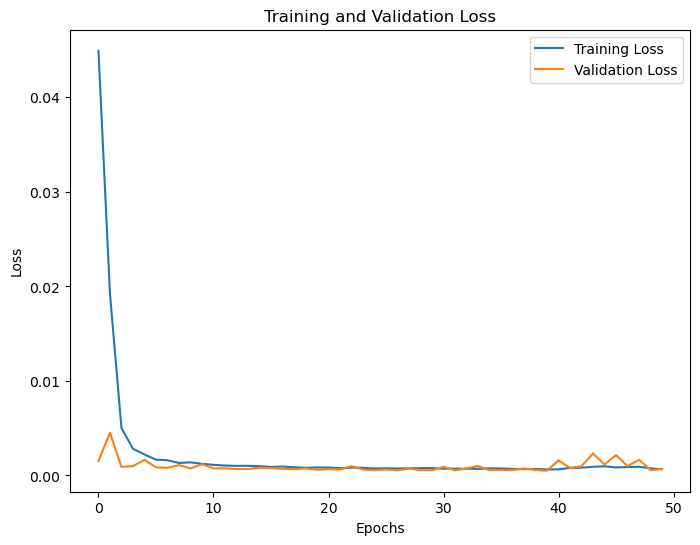

In [21]:
# Visualisasi Train - Validation Loss
val_loss = history.history['val_loss']

# Plot training loss and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [22]:
#RMSE
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE: {}".format(rmse))

# R-squared
r2 = r2_score(y_test, predictions)
print("R2: {:.2f}%".format(r2*100))

#SMAPE
smape = np.mean(np.abs((y_test - predictions) / (y_test + predictions))) * 200
print("SMAPE: ", smape)

31/31 [==============================] - 3s 61ms/step
RMSE: 146.72729718011306
R2: 88.89%
SMAPE:  13.002753545133054


Pelatihan model dengan jumlah epochs dan batch size yang sama ketika tuning hyperparameter.

In [23]:
input_unit = 96
n_layers = 2
lstm_0_units = 96
layer_2_neurons = 192
Dropout_rate = 0.3
flatten_format = 'channels_last'
dense_activation = 'sigmoid'
lstm_1_units = 256

# Define the LSTM model
model = keras.Sequential()

# Add the first LSTM layer
model.add(keras.layers.LSTM(units=input_unit, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add additional LSTM layers
for i in range(1, n_layers):
    model.add(keras.layers.LSTM(units=lstm_0_units, activation='relu', return_sequences=True))

# Add the last LSTM layer
model.add(keras.layers.LSTM(units=layer_2_neurons))

# Add Dropout layer
model.add(keras.layers.Dropout(rate=Dropout_rate))

# Flatten the output from the LSTM layers
model.add(keras.layers.Flatten(data_format=flatten_format))

# Add dense layers
model.add(keras.layers.Dense(units=lstm_1_units, activation=dense_activation))
model.add(keras.layers.Dense(units=1))

# Line 6
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60, 96)            37632     
                                                                 
 lstm_8 (LSTM)               (None, 60, 96)            74112     
                                                                 
 lstm_9 (LSTM)               (None, 192)               221952    
                                                                 
 dropout_2 (Dropout)         (None, 192)               0         
                                                                 
 flatten_2 (Flatten)         (None, 192)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               49408     
                                                                 
 dense_4 (Dense)             (None, 1)                

Dari kode diatas, penjelasannya adalah:
1. <b> model = keras.Sequential(): </b> Membuat objek model Sequential yang akan digunakan untuk membangun model secara bertahap.
2. <b>model.add(keras.layers.LSTM(units=input_unit, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))): </b> Menambahkan layer LSTM pertama ke dalam model. Jumlah unit LSTM pada layer ini adalah input_unit yang merupakan suatu variabel yang diharapkan telah didefinisikan sebelumnya. Fungsi aktivasi yang digunakan adalah 'relu'. return_sequences=True mengindikasikan bahwa layer ini akan mengembalikan hasil keluaran dalam urutan sekuensial. input_shape=(x_train.shape[1], 1) menentukan dimensi input untuk layer ini.
3. <b>for i in range(1, n_layers):: </b> Melakukan loop berdasarkan jumlah layer LSTM yang akan ditambahkan ke dalam model. Jumlah layer LSTM ini ditentukan oleh variabel n_layers yang diharapkan telah didefinisikan sebelumnya. Loop dimulai dari 1 karena layer pertama sudah ditambahkan sebelumnya.
4. <b> model.add(keras.layers.LSTM(units=lstm_0_units, activation='relu', return_sequences=True)): </b> Menambahkan layer LSTM berikutnya ke dalam model. Jumlah unit LSTM pada layer ini adalah lstm_0_units yang merupakan suatu variabel yang diharapkan telah didefinisikan sebelumnya. Fungsi aktivasi yang digunakan adalah 'relu'. return_sequences=True mengindikasikan bahwa layer ini akan mengembalikan hasil keluaran dalam urutan sekuensial.
5. <b> model.add(keras.layers.LSTM(units=layer_2_neurons)): </b> Menambahkan layer LSTM terakhir ke dalam model. Jumlah unit LSTM pada layer ini adalah layer_2_neurons yang merupakan suatu variabel yang diharapkan telah didefinisikan sebelumnya. Layer ini berbeda dari layer sebelumnya karena return_sequences diatur sebagai False. Ini berarti layer terakhir ini tidak menghasilkan keluaran sekuensial.
6. <b> model.add(keras.layers.Dropout(rate=Dropout_rate)): </b> Menambahkan layer Dropout ke dalam model. Layer ini digunakan untuk menerapkan dropout pada output sebelumnya dengan tingkat dropout yang ditentukan oleh variabel Dropout_rate yang diharapkan telah didefinisikan sebelumnya.
7. <b> model.add(keras.layers.Flatten(data_format=flatten_format)): 
</b> Menambahkan layer Flatten ke dalam model. Layer ini digunakan untuk mengubah keluaran dari layer sebelumnya menjadi vektor satu dimensi. data_format ditentukan oleh variabel flatten_format yang diharapkan telah didefinisikan sebelumnya.
8. <b>model.add(keras.layers.Dense(units=lstm_1_units, activation=dense_activation)): </b> Menambahkan layer Dense (fully connected layer) ke dalam model. Jumlah unit pada layer ini adalah lstm_1_units yang merupakan suatu variabel yang diharapkan telah didefinisikan sebelumnya. Fungsi aktivasi yang digunakan ditentukan oleh variabel dense_activation.
9. <b> model.add(keras.layers.Dense(units=1)): </b> Menambahkan layer Dense

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

In [25]:
history = model.fit(x = x_train, y = y_train, batch_size=256, epochs=50, validation_split=0.2)

Epoch 1/50
7/7 [==============================] - 9s 592ms/step - loss: 0.0392 - root_mean_squared_error: 0.1979 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1063
Epoch 2/50
7/7 [==============================] - 3s 449ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0413
Epoch 3/50
7/7 [==============================] - 3s 435ms/step - loss: 0.0035 - root_mean_squared_error: 0.0594 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 4/50
7/7 [==============================] - 3s 432ms/step - loss: 0.0021 - root_mean_squared_error: 0.0456 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0477
Epoch 5/50
7/7 [==============================] - 3s 428ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 9.6719e-04 - val_root_mean_squared_error: 0.0311
Epoch 6/50
7/7 [==============================] - 3s 433ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0010 - val_root_mea

Melatih model dengan data latih, dilakukan sebanyak 50 iterasi, dengan 256 sampel digunakan di tiap iterasinya. Menggunakan 20% dari data latih sebagai data validasinya. 

Menggambarkan plot Train - Validation Loss. <br>
Plot ini akan menentukan apakah model yang digunakan mengalami overfitting/underfitting.

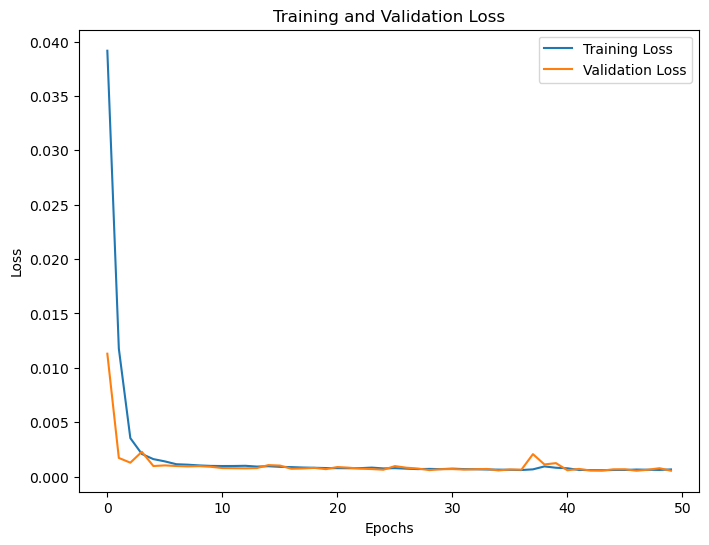

In [26]:
val_loss = history.history['val_loss']

# Plot training loss and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Berdasarkan plot diatas, tidak ditemukan adanya indikasi overfitting/underfitting. Artinya model berjalan sesuai dengan harapan.

---

#### Evaluasi

In [27]:
#RMSE
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE: {}".format(rmse))

# R-squared
r2 = r2_score(y_test, predictions)
print("R2: {:.2f}%".format(r2*100))

#SMAPE
smape = np.mean(np.abs((y_test - predictions) / (y_test + predictions))) * 200
print("SMAPE: ", smape)

31/31 [==============================] - 2s 35ms/step
RMSE: 4.695813327016958
R2: 89.63%
SMAPE:  13.016613872062397


Hasil luaran dari model terbilang sangat baik karena menghasilkan nilai RMSE yang rendah, R-squared yang mendekati 100%, dan SMAPE yang kecil.

---
#### Visualisasi prediksi harga saham

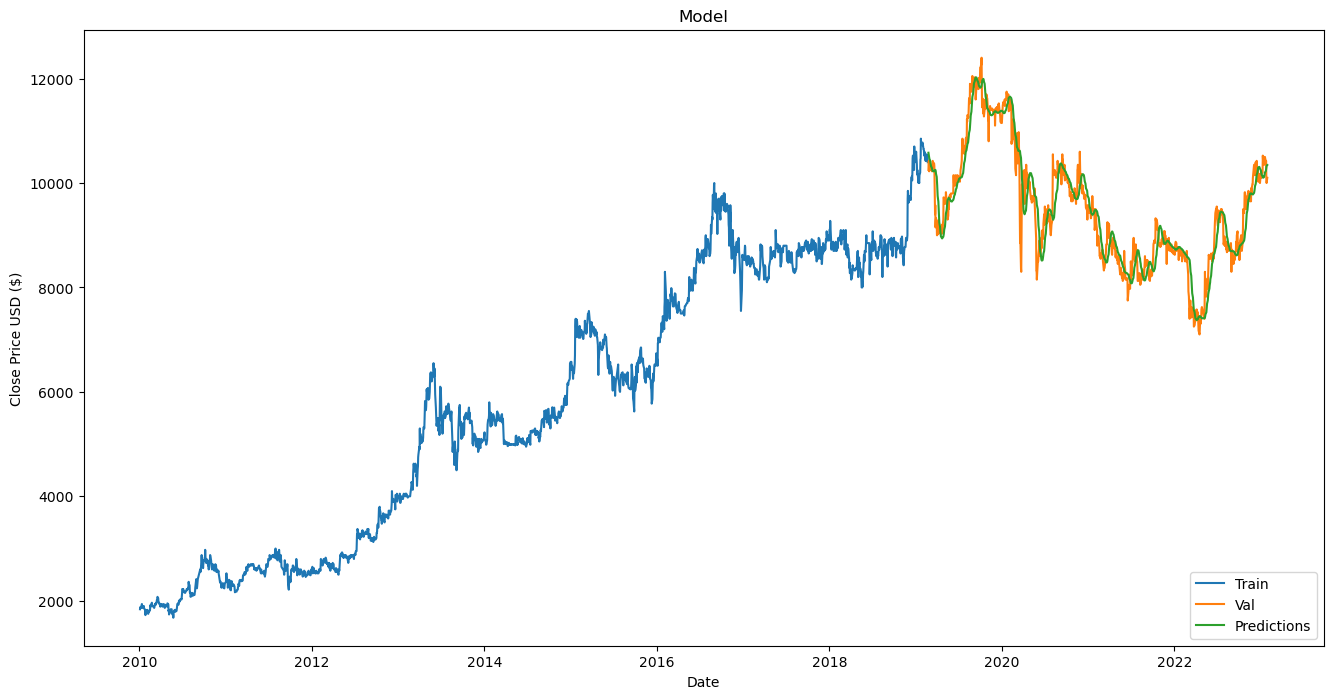

In [28]:
# Ubah indeks menjadi objek datetime
icbp['Date'] = pd.to_datetime(icbp['Date'])
icbp.set_index('Date', inplace=True)

data = icbp.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#### Detail dari plot Validation - Prediction diatas

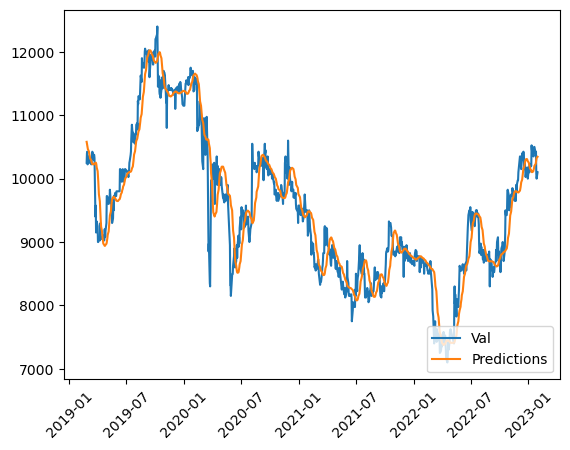

In [29]:
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.xticks(rotation=45)
plt.show()